<a href="https://colab.research.google.com/github/tejaswiniat/Go_digit-assignment/blob/main/AssignmentFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score


In [2]:
from google.colab import files
data_to_load = files.upload()

Saving Digit_data.xlsx to Digit_data.xlsx


In [3]:
data = pd.read_excel('Digit_data.xlsx')

In [4]:
# Basic Info
print("Basic Information:")
print(data.info())

# Checking for Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

# Summary Statistics for Numerical Features
print("\nSummary Statistics:")
print(data.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   int64  
 1   City       2278 non-null   object 
 2   age_group  2278 non-null   object 
 3   RIDAGEYR   2278 non-null   int64  
 4   RIAGENDR   2278 non-null   int64  
 5   PAQ605     2278 non-null   int64  
 6   BMXBMI     2278 non-null   float64
 7   LBXGLU     2278 non-null   int64  
 8   DIQ010     2278 non-null   int64  
 9   LBXGLT     2278 non-null   int64  
 10  LBXIN      2278 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 195.9+ KB
None

Missing Values:
SEQN         0
City         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

Summary Statistics:
               SEQN     RIDAGEYR     RIAGENDR       PAQ605       BMXB

In [5]:
label_encoder = LabelEncoder()
data['age_group_encoded'] = label_encoder.fit_transform(data['age_group'])

In [6]:
data.head()

,SEQN,City,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_encoded
0,73564,DENVER,Adult,61,2,2,35.7,110,2,150,14.91,0
1,73568,US,Adult,26,2,2,20.3,89,2,80,3.85,0
2,73576,US,Adult,16,1,2,23.2,89,2,68,6.14,0
3,73577,US,Adult,32,1,2,28.9,104,2,84,16.15,0
4,73580,NEW YORK,Adult,38,2,1,35.9,103,2,81,10.92,0


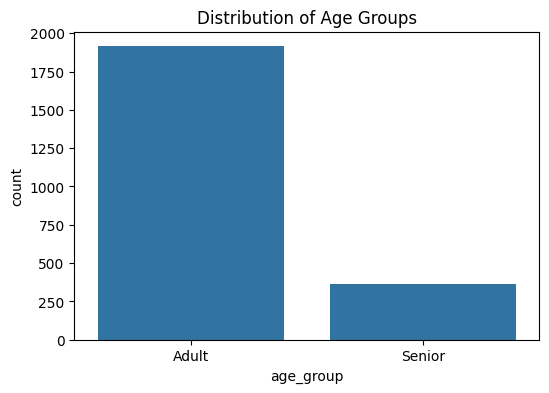

In [7]:
# Distribution of Target Variable (age_group)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='age_group')
plt.title('Distribution of Age Groups')
plt.show()

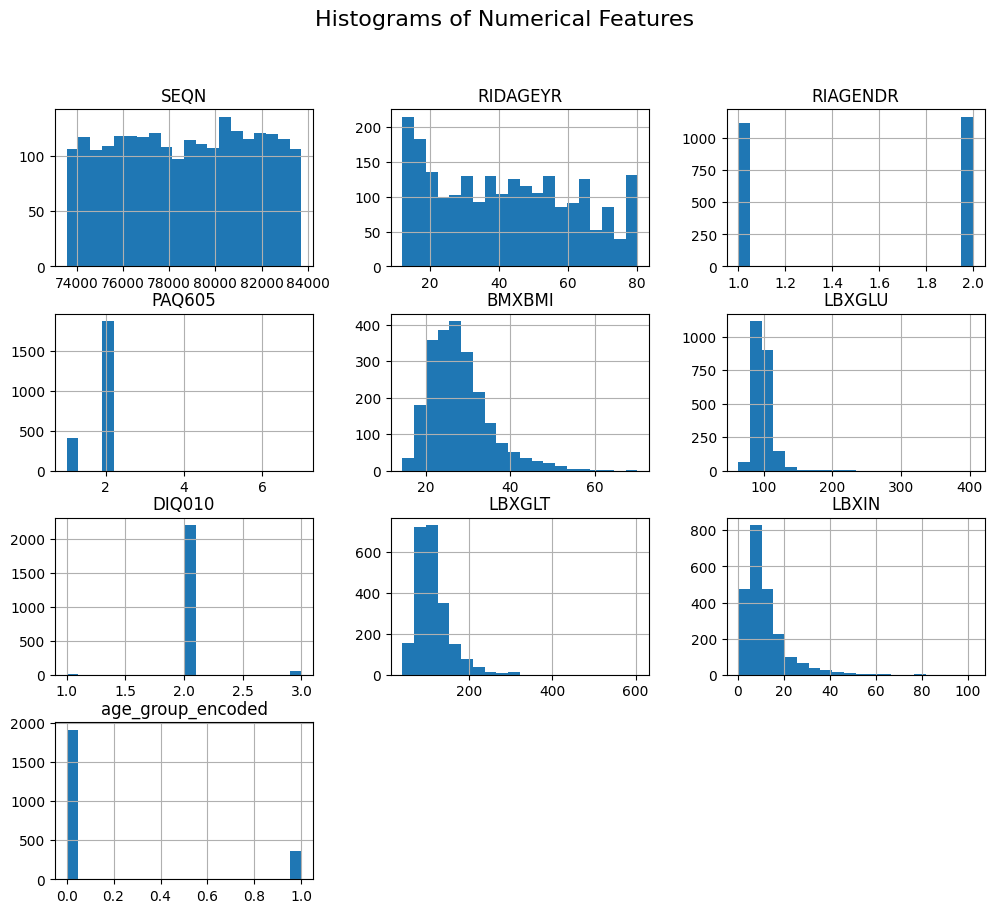

In [8]:
# Distribution of Numerical Features
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

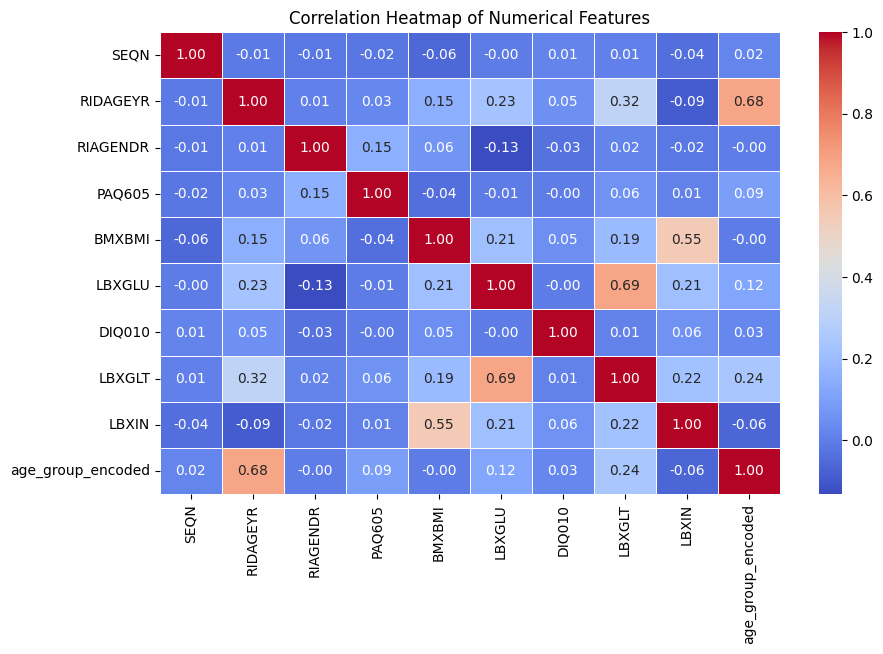

In [9]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

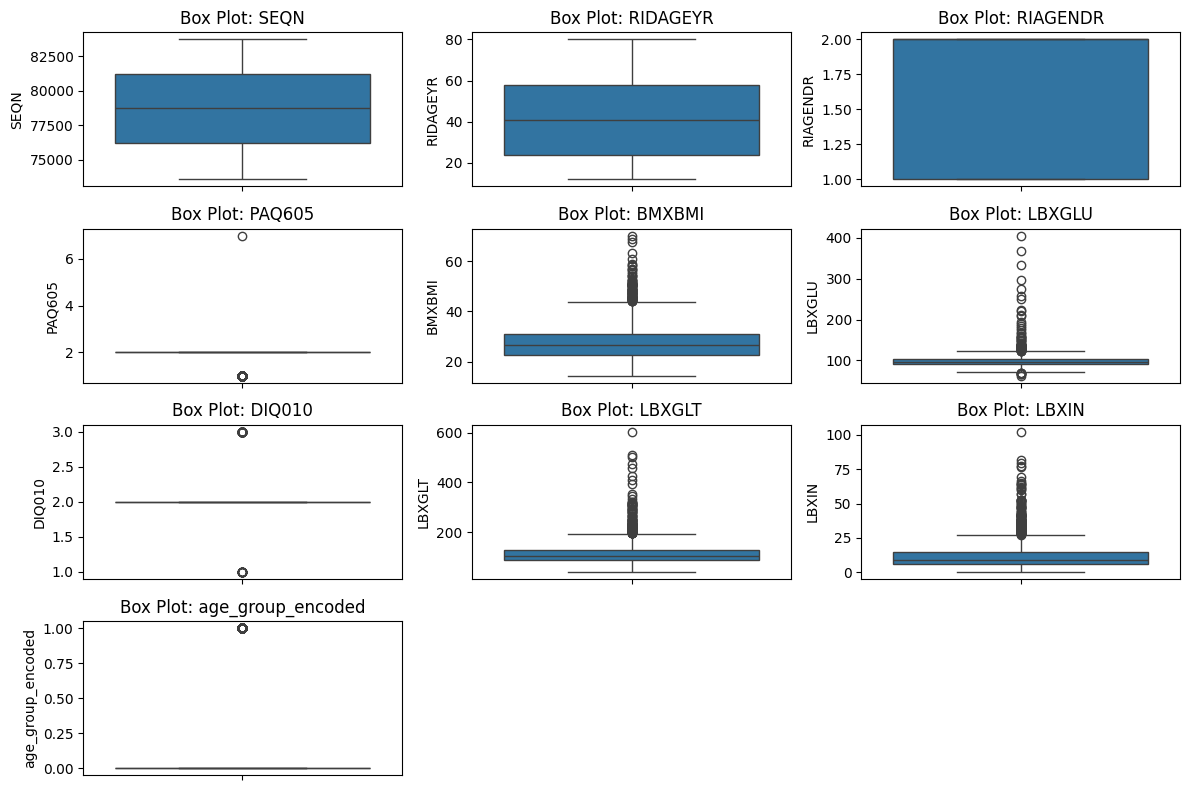

In [10]:
# Box Plots for Outlier Detection
plt.figure(figsize=(12, 8))

num_cols = len(numerical_columns)
num_rows = (num_cols + 2) // 3

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Box Plot: {column}')
plt.tight_layout()
plt.show()

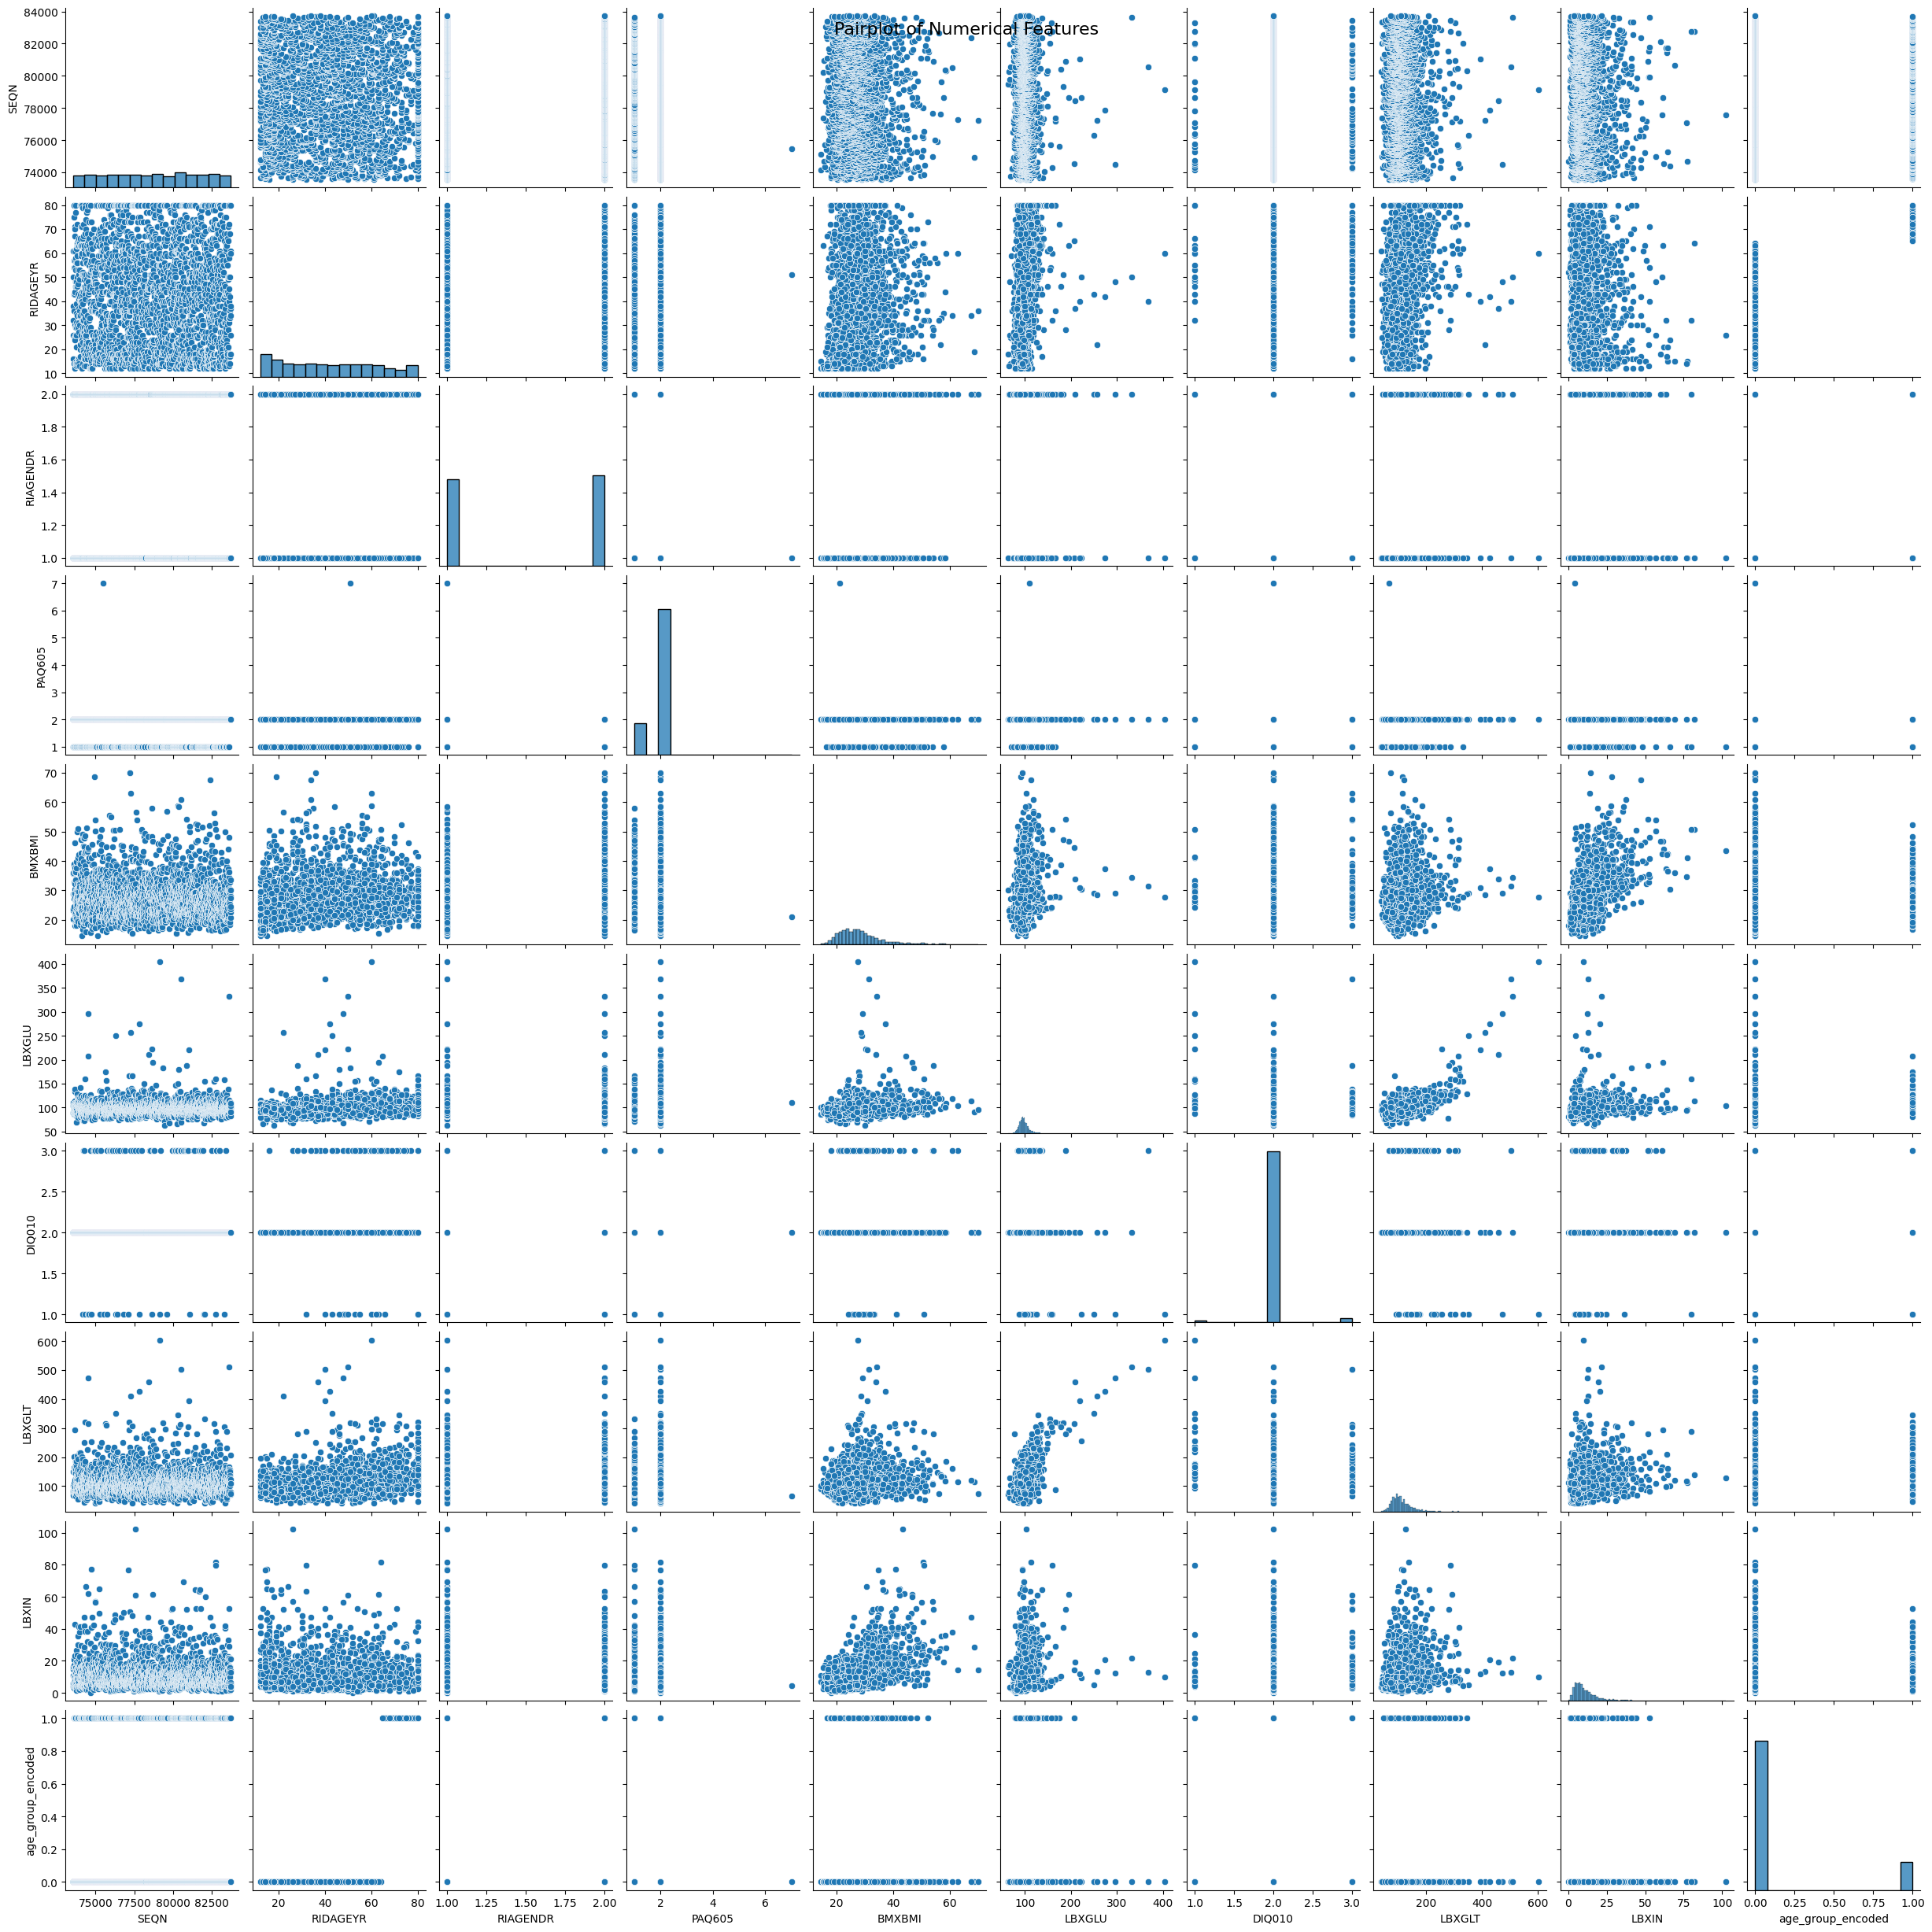

In [11]:
# Pairplot to Visualize Relationships Between Features
sns.pairplot(data[numerical_columns], height=2.5)
plt.suptitle('Pairplot of Numerical Features', fontsize=16)
plt.show()

<Figure size 1200x800 with 0 Axes>

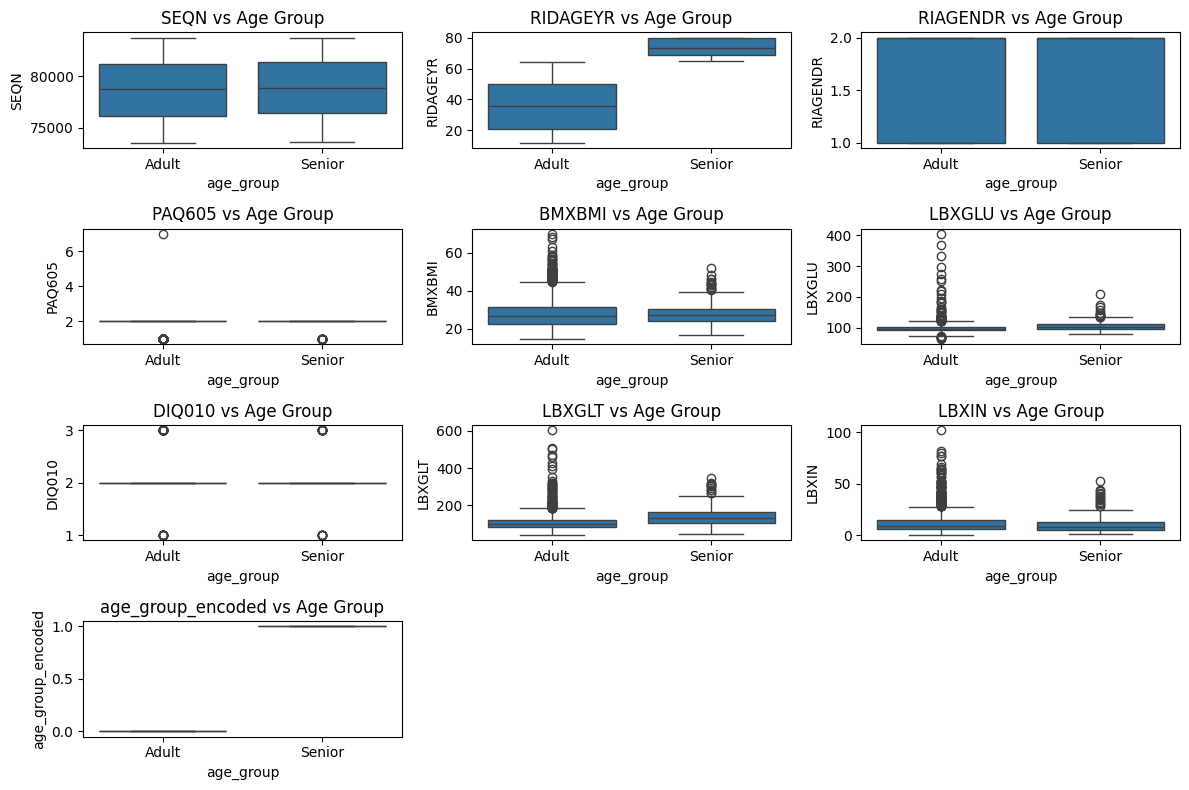

In [12]:
# Analyze Relationship between Numerical Features and Age Group
plt.figure(figsize=(12, 8))
num_cols = len(numerical_columns)
num_rows = (num_cols + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 8))
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    sns.boxplot(x='age_group', y=column, data=data, ax=axes[i])
    axes[i].set_title(f'{column} vs Age Group')

# Hide any unused subplots
for i in range(len(numerical_columns), num_rows * 3):
    axes[i].set_visible(False)
plt.tight_layout()
plt.show()

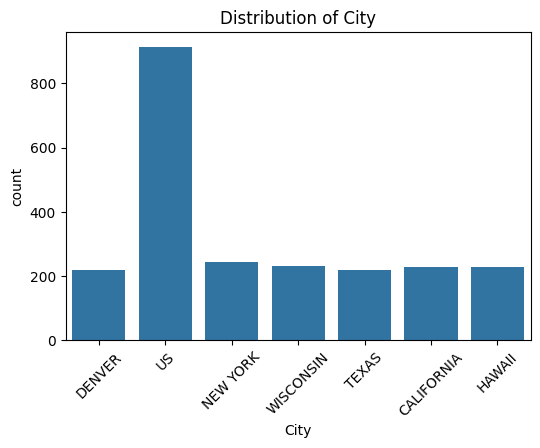

In [13]:
# Visualize Categorical Features (City, Age Group)
plt.figure(figsize=(6, 4))
sns.countplot(x='City', data=data)
plt.title('Distribution of City')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Using Z-score to identify outliers (Threshold > 3 standard deviations)
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(data[numerical_columns]))

# Identify outliers
outliers = (z_scores > 3).all(axis=1)  # Outliers are rows where all features have Z-score > 3
print(f"\nNumber of outliers detected: {np.sum(outliers)}")

# Remove outliers
data_no_outliers = data[~outliers]
print(f"Data after removing outliers: {data_no_outliers.shape}")


Number of outliers detected: 0
Data after removing outliers: (2278, 12)


In [15]:
from scipy.stats import chi2_contingency

# Create a contingency table of 'City' and 'age_group'
contingency_table = pd.crosstab(data['City'], data['age_group'])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")

Chi-Square Statistic: 5.675000591799982
P-Value: 0.46056277848145


Since the p-value is 0.4606, which is greater than 0.05, we fail to reject the null hypothesis. This indicates that there is no significant association between the age_group and City at the 5% significance level.


In [16]:
from scipy import stats

# List of numerical columns to test
numerical_columns = ['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

# Group the data by 'City' and perform ANOVA for each numerical feature
anova_results = {}
for column in numerical_columns:
    city_groups = [data[data['City'] == city][column].dropna() for city in data['City'].unique()]
    f_stat, p_value = stats.f_oneway(*city_groups)
    anova_results[column] = {'F-Statistic': f_stat, 'P-Value': p_value}

# Display the results
anova_results_df = pd.DataFrame(anova_results).T
print(anova_results_df)

          F-Statistic   P-Value
RIDAGEYR     1.203308  0.301444
BMXBMI       0.741957  0.615844
LBXGLU       0.746133  0.612499
LBXGLT       1.457426  0.189012
LBXIN        1.108961  0.354442


None of the features show a statistically significant difference between the city categories based on the ANOVA results (all p-values > 0.05). Therefore, these features do not appear to influence the age_group variable significantly.

In [17]:
X = data.drop(columns=['age_group', 'age_group_encoded', 'SEQN', 'City'])
y = data['age_group_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [18]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=8)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=8, random_state=42)

In [19]:
# Feature importance analysis
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
# Display feature importances
print("Feature Importances:")
print(feature_importances)

Feature Importances:
    Feature  Importance
0  RIDAGEYR    0.874465
6    LBXGLT    0.061544
7     LBXIN    0.026255
4    LBXGLU    0.016035
3    BMXBMI    0.013004
2    PAQ605    0.005822
1  RIAGENDR    0.001500
5    DIQ010    0.001374


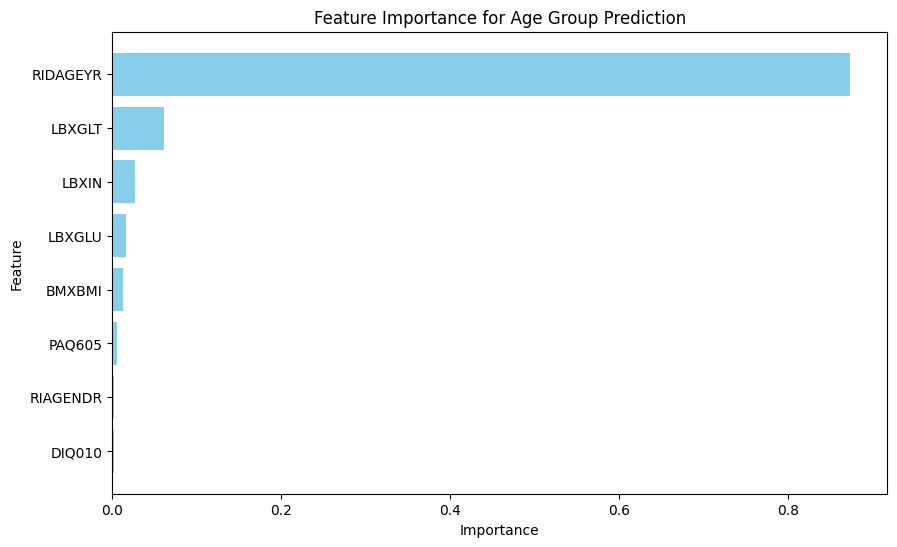

In [20]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Age Group Prediction')
plt.gca().invert_yaxis()
plt.show()

When there is age in years no point in building a model which shows age category.So removing that feature and testing

In [21]:
X1 = data.drop(columns=['age_group', 'age_group_encoded', 'SEQN', 'City','RIDAGEYR'])
y1 = data['age_group_encoded']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42, stratify=y)

In [23]:
rf_model1 = RandomForestClassifier(random_state=42, n_estimators=8)
rf_model1.fit(X1_train, y1_train)

RandomForestClassifier(n_estimators=8, random_state=42)

In [28]:
# Feature importance analysis
feature_importances1 = pd.DataFrame({
    'Feature': X1.columns,
    'Importance': rf_model1.feature_importances_
}).sort_values(by='Importance', ascending=False)
# Display feature importances
print("Feature Importances:")
print(feature_importances1)

Feature Importances:
    Feature  Importance
5    LBXGLT    0.297810
2    BMXBMI    0.233022
6     LBXIN    0.232500
3    LBXGLU    0.180013
1    PAQ605    0.022421
0  RIAGENDR    0.020324
4    DIQ010    0.013910


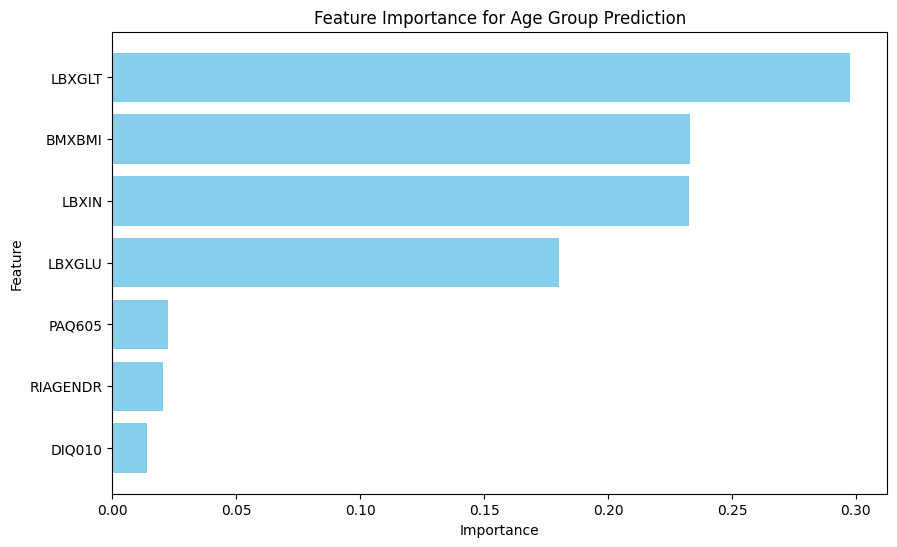

In [29]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances1['Feature'], feature_importances1['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Age Group Prediction')
plt.gca().invert_yaxis()
plt.show()

In [30]:
X2 = data.drop(columns=['age_group', 'age_group_encoded', 'SEQN', 'City','RIDAGEYR','PAQ605','RIAGENDR','DIQ010'])
y2 = data['age_group_encoded']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42, stratify=y)

In [31]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42, stratify=y)

In [32]:
rf_model2 = RandomForestClassifier(random_state=42, n_estimators=8)
rf_model2.fit(X2_train, y2_train)

RandomForestClassifier(n_estimators=8, random_state=42)

In [36]:
y2_pred = rf_model2.predict(X2_test)
# Evaluate the model
accuracy = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy:.4f}')
print("Classification Report:")
print(classification_report(y2_test, y2_pred, target_names=label_encoder.classes_))

Accuracy: 0.8275
Classification Report:
              precision    recall  f1-score   support

       Adult       0.85      0.96      0.90       575
      Senior       0.38      0.14      0.20       109

    accuracy                           0.83       684
   macro avg       0.62      0.55      0.55       684
weighted avg       0.78      0.83      0.79       684



Precision for "Senior" is low (0.38): Out of all predictions made for the "Senior" class, only 38% are correct.
Recall for "Senior" is very low (0.14): The model correctly identifies only 14% of actual "Senior" instances.
Class imbalance: There are far fewer instances of "Senior" compared to "Adult" (109 vs. 575). This imbalance skews the model's predictions toward the majority class.

In [37]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X2, y2)

print(f'Original dataset size: {X2.shape}')
print(f'Resampled dataset size: {X_resampled.shape}')

Original dataset size: (2278, 4)
Resampled dataset size: (3828, 4)


In [39]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


In [41]:
# Train a Random Forest Classifier on resampled data
rf_model_smote = RandomForestClassifier(random_state=42, n_estimators=8)
rf_model_smote.fit(X3_train, y3_train)

# Evaluate model performance after SMOTE
y_pred_smote = rf_model_smote.predict(X3_test)
accuracy = accuracy_score(y3_test, y_pred_smote)
print(f'Accuracy: {accuracy:.4f}')
print("Classification Report (After SMOTE):")
print(classification_report(y3_test, y_pred_smote, target_names=label_encoder.classes_))

Accuracy: 0.7990
Classification Report (Before SMOTE):
              precision    recall  f1-score   support

       Adult       0.78      0.84      0.81       575
      Senior       0.83      0.76      0.79       574

    accuracy                           0.80      1149
   macro avg       0.80      0.80      0.80      1149
weighted avg       0.80      0.80      0.80      1149



The model seems to handle both classes fairly well, with a slight imbalance in recall (favoring "Adult").
The performance is reasonable and may not necessitate SMOTE unless further improvement in the minority class performance is desired.

In [92]:
# Train a Random Forest Classifier on resampled data
rf_model_smote1 = RandomForestClassifier(random_state=42, n_estimators=50)
rf_model_smote1.fit(X3_train, y3_train)

# Evaluate model performance after SMOTE
y_pred_smote1 = rf_model_smote1.predict(X3_test)
accuracy_smote1 = accuracy_score(y3_test, y_pred_smote1)
print(f'Accuracy (After SMOTE): {accuracy_smote1:.4f}')
print("Classification Report (After SMOTE):")
print(classification_report(y3_test, y_pred_smote1, target_names=label_encoder.classes_))

# Apply class weights to the Random Forest model
rf_model_weighted = RandomForestClassifier(random_state=42, n_estimators=50, class_weight='balanced')
rf_model_weighted.fit(X3_train, y3_train)

# Evaluate model performance after applying class weights
y_pred_weighted = rf_model_weighted.predict(X3_test)
accuracy_weighted = accuracy_score(y3_test, y_pred_weighted)
print(f'Accuracy (After Class Weights): {accuracy_weighted:.4f}')
print("\nClassification Report (After Class Weights):")
print(classification_report(y3_test, y_pred_weighted, target_names=label_encoder.classes_))


Accuracy (After SMOTE): 0.8320
Classification Report (After SMOTE):
              precision    recall  f1-score   support

       Adult       0.84      0.82      0.83       575
      Senior       0.82      0.84      0.83       574

    accuracy                           0.83      1149
   macro avg       0.83      0.83      0.83      1149
weighted avg       0.83      0.83      0.83      1149

Accuracy (After Class Weights): 0.8329

Classification Report (After Class Weights):
              precision    recall  f1-score   support

       Adult       0.84      0.82      0.83       575
      Senior       0.83      0.84      0.83       574

    accuracy                           0.83      1149
   macro avg       0.83      0.83      0.83      1149
weighted avg       0.83      0.83      0.83      1149



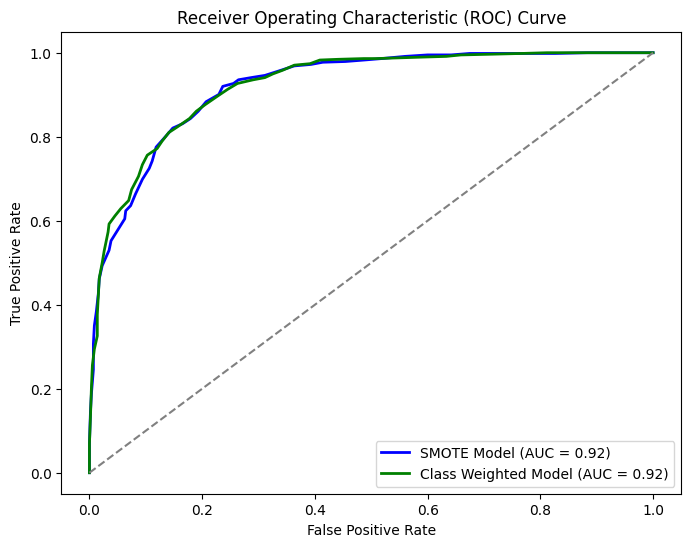

AUC-ROC (After SMOTE): 0.9199
AUC-ROC (After Class Weights): 0.9219


In [93]:
from sklearn.metrics import roc_curve, auc
# For SMOTE model
y_pred_prob_smote1 = rf_model_smote1.predict_proba(X3_test)[:, 1]  # Get probabilities for the positive class
fpr_smote1, tpr_smote1, _ = roc_curve(y3_test, y_pred_prob_smote1)  # Compute ROC curve
roc_auc_smote1 = auc(fpr_smote1, tpr_smote1)  # Calculate AUC

# For Weighted model
y_pred_prob_weighted = rf_model_weighted.predict_proba(X3_test)[:, 1]  # Get probabilities for the positive class
fpr_weighted, tpr_weighted, _ = roc_curve(y3_test, y_pred_prob_weighted)  # Compute ROC curve
roc_auc_weighted = auc(fpr_weighted, tpr_weighted)  # Calculate AUC

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote1, tpr_smote1, color='blue', lw=2, label=f'SMOTE Model (AUC = {roc_auc_smote1:.2f})')
plt.plot(fpr_weighted, tpr_weighted, color='green', lw=2, label=f'Class Weighted Model (AUC = {roc_auc_weighted:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores
print(f"AUC-ROC (After SMOTE): {roc_auc_smote1:.4f}")
print(f"AUC-ROC (After Class Weights): {roc_auc_weighted:.4f}")

Both models have AUC-ROC scores above 0.9, which indicates that both models are performing well in distinguishing between the classes (Adult vs. Senior).
The Class Weighted model (AUC = 0.9219) performs slightly better than the SMOTE model (AUC = 0.9199), but the difference is minimal.


## Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(
    n_estimators=50,  # Number of boosting stages
    learning_rate=0.1,  # Step size shrinkage
    max_depth=5,  # Maximum depth of individual trees
    subsample=0.8,  # Fraction of samples used for fitting the trees
    random_state=42
)
gbc_model.fit(X3_train, y3_train)
y_pred_gbc = gbc_model.predict(X3_test)

In [51]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y3_test, y_pred_gbc))

accuracy = accuracy_score(y3_test, y_pred_gbc)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       575
           1       0.77      0.81      0.79       574

    accuracy                           0.78      1149
   macro avg       0.78      0.78      0.78      1149
weighted avg       0.78      0.78      0.78      1149

Accuracy: 0.7824


# XGBOOST

In [59]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification (Adult vs Senior)
    eval_metric='logloss',  # Log loss for binary classification
    learning_rate=0.1,  # Learning rate
    n_estimators=50,  # Number of boosting rounds
    max_depth=5,  # Maximum depth of trees (tune for regularization)
    subsample=0.7,  # Subsample ratio
    colsample_bytree=0.8,  # Column sample ratio
    alpha=1,  # L1 regularization term
    lambda_=1  # L2 regularization term
)

# Fit the model
model.fit(X3_train, y3_train)

# 5. Make predictions
y_pred_xgb = model.predict(X3_test)

# 6. Evaluate the model
accuracy = accuracy_score(y3_test, y_pred_xgb)
print(f'Accuracy: {accuracy:.4f}')

# Classification report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y3_test, y_pred_xgb))



Accuracy: 0.7633

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       575
           1       0.75      0.79      0.77       574

    accuracy                           0.76      1149
   macro avg       0.76      0.76      0.76      1149
weighted avg       0.76      0.76      0.76      1149



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:13:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


# Basic logistic Regression model

In [73]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=50, random_state=42)

# Train the model
logreg_model.fit(X3_train, y3_train)

# Predict on the test data
y_pred_basic = logreg_model.predict(X3_test)

# Evaluate performance
print("Classification Report (Logistic Regression - Default):")
print(classification_report(y3_test, y_pred_basic))
print(f"Accuracy: {accuracy_score(y3_test, y_pred_basic):.4f}")

Classification Report (Logistic Regression - Default):
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       575
           1       0.72      0.63      0.67       574

    accuracy                           0.69      1149
   macro avg       0.70      0.69      0.69      1149
weighted avg       0.70      0.69      0.69      1149

Accuracy: 0.6928


In [82]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1'],  # 'l1' requires 'liblinear' solver, which works better on smaller datasets
    'solver': ['liblinear', 'saga'],
    'max_iter': [10, 30, 100]
}

# Initialize Logistic Regression
logreg_model1 = LogisticRegression(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(logreg_model1, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X3_train, y3_train)

# Best parameters and model
best_params = grid_search.best_params_
best_logreg_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 1, 'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [83]:
y_pred_tuned = best_logreg_model.predict(X3_test)

# Evaluate performance
print("Classification Report (Tuned Logistic Regression):")
print(classification_report(y3_test, y_pred_tuned))
print(f"Accuracy: {accuracy_score(y3_test, y_pred_tuned):.4f}")

Classification Report (Tuned Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       575
           1       0.72      0.63      0.67       574

    accuracy                           0.70      1149
   macro avg       0.70      0.70      0.69      1149
weighted avg       0.70      0.70      0.69      1149

Accuracy: 0.6954


# LIGHTGBM

In [95]:
import lightgbm as lgb
# Prepare the LightGBM dataset
train_data = lgb.Dataset(X3_train, label=y3_train)
test_data = lgb.Dataset(X3_test, label=y3_test, reference=train_data)

# Define basic LightGBM parameters
params = {
    'objective': 'binary',  # Binary classification task
    'metric': 'binary_error',  # Metric for evaluation
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # Maximum number of leaves in a tree
    'learning_rate': 0.05,  # Step size to prevent overfitting
    'feature_fraction': 0.9,  # Fraction of features used in each iteration
    'bagging_fraction': 0.8,  # Fraction of data used in each iteration
    'bagging_freq': 5,  # Frequency of bagging
    'verbosity': -1  # Suppress logging
}

# Train the model
num_round = 100  # Number of boosting iterations
early_stopping_rounds = 30  # Stop early if no improvement
model = lgb.train(params,
                  train_data,
                  num_round,
                  valid_sets=[test_data],
                  callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_rounds)])

# Make predictions
y_pred_lgt = model.predict(X3_test, num_iteration=model.best_iteration)

# Convert probabilities to binary output
y_pred_binary = (y_pred_lgt >= 0.5).astype(int)

# Evaluate performance
print("Classification Report (LightGBM - Default):")
print(classification_report(y3_test, y_pred_binary))
print(f"Accuracy: {accuracy_score(y3_test, y_pred_binary):.4f}")

Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[82]	valid_0's binary_error: 0.201915
Classification Report (LightGBM - Default):
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       575
           1       0.78      0.82      0.80       574

    accuracy                           0.80      1149
   macro avg       0.80      0.80      0.80      1149
weighted avg       0.80      0.80      0.80      1149

Accuracy: 0.7981


# **Report**



**Assuming the business goal as:**
 Predicting the age group of individuals (classified as Adult or Senior) based on various features such as demographic data (e.g., age, gender), health-related measures (e.g., BMI, glucose levels), and behavior (e.g., physical activity).

 **Potential Ethical Concerns and Legal Considerations:**
 Age-based Discrimination: Predicting age categories (Adult vs. Senior) could lead to age-based discrimination in various sectors, including healthcare, insurance, or job recruitment. Companies must be cautious about using this classification to make decisions that could unfairly disadvantage or exclude certain individuals.

 **Key Steps in the Data Analysis:**
Data Cleaning: Checked for missing values and handled them where necessary.
Exploratory Data Analysis (EDA): Analyzed distributions, correlations, and relationships among features.
Feature Engineering: Identified important features affecting the target variable age_group.
Model Evaluation: Built several models (e.g., Random Forest, XGBoost,LightGBM and Basic logistic regression model) to predict the age_group and assessed performance using various metrics, including accuracy and AUC-ROC.


**Features:**
SEQN: Unique identifier for each participant.
RIDAGEYR: Age in years.
RIAGENDR: Gender (1 = Male, 2 = Female).
PAQ605: Physical activity level.
BMXBMI: Body mass index.
LBXGLU: Glucose level.
DIQ010: Diabetes status.
LBXGLT: Glutamate level.
LBXIN: Insulin level.

**Target Variable:**
age_group: The classification target (Adult or Senior).


***Exploratory Data Analysis (EDA)***

**Missing Data:** There were no missing values in the dataset.
**Summary Statistics:**
The age group is highly imbalanced, with more "Adult" individuals than "Senior" individuals.
Features like age (RIDAGEYR), BMI (BMXBMI), glucose level (LBXGLU), and insulin level (LBXIN) show a varying range of values.

**Visualizations:**
Age Distribution: The age distribution shows a clear split between younger adults and older seniors, which corresponds to the target variable age_group.

Correlation Matrix: The features RIDAGEYR, BMXBMI, and LBXGLU show some level of correlation with the target variable age_group. However, most correlations among the independent variables are low, indicating little multicollinearity.

 **Feature Importance**
Using a Random Forest model, we assessed the importance of each feature in predicting the age_group:

**Important Features:**
RIDAGEYR (Age): Dominates the model, suggesting that age is the most important feature for classification.
LBXGLT (Glutamate): Plays a moderate role in differentiating the age groups.
LBXGLU (Glucose): Affects the classification, with a positive correlation to age.
BMXBMI (BMI): Although not as important as age, BMI has a notable influence on age group classification.

However The feature Age contributed more I dont see the need of building the classification model given age in years and predicting age category.So I omitted the feature


**Model Evaluation**

**Random Forest:**

*Without SMOTE:* Accuracy of 0.80, showing balanced precision and recall for both "Adult" and "Senior" classes.
*With SMOTE:* Improved accuracy and recall for the minority class (Senior).
*With Class Weights:* Similar performance to SMOTE, with slight improvement in the recall for the "Senior" class.
**Accuracy**
After SMOTE: 0.8320
After Class Weights: 0.8329
The accuracy is almost identical in both cases, with a slight improvement when class weights are used. This suggests that both techniques are effective in handling class imbalance, but the improvements are marginal
*Adult Class:*
Precision: 0.84 – The model is highly accurate in predicting the "Adult" class.
Recall: 0.82 – The model captures 82% of actual "Adult" cases.
F1-Score: 0.83 – The balance between precision and recall is strong for the "Adult" category.
*Senior Class:*
Precision: 0.82 – The model is also quite precise in predicting the "Senior" class.
Recall: 0.84 – The model is able to capture 84% of actual "Senior" cases.
F1-Score: 0.83 – The balance between precision and recall is similarly strong for the "Senior" category.
Since both techniques yield similar results, you might choose based on the ease of implementation and the specific use case

**AUC-ROC Scores:**
Both models perform well, with AUC scores above 0.9, indicating strong discrimination power between "Adult" and "Senior" classes.


**Conclusion**
This analysis shows that the Random Forest model, particularly with class weights or SMOTE, provides high predictive accuracy for the task of classifying individuals as either "Adult" or "Senior" based on various demographic and health features. The key features influencing the classification are  glucose levels, and glutamate levels. Both the AUC-ROC and the classification report suggest that the models are performing well and can be used for reliable classification tasks.



